### objective- to predict the likeleyhood of a hit song using log regression

<a id="2"></a> 
## Import Libraries

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import random
import string

from matplotlib.pyplot import xticks
%matplotlib inline


In [2]:
df=pd.read_csv('okdf.csv')
df.head()

,Unnamed: 0,valence,acousticness,danceability,duration_ms,energy,explicit,liveness,loudness,speechiness,popularity_bin
0,0,0.0594,0.982,0.279,301827,0.211,0,0.344,-19.076,0.0366,0
1,1,0.9630,0.732,0.819,180533,0.341,0,0.160,-12.441,0.1270,0
2,2,0.0394,0.961,0.328,301827,0.166,0,0.101,-14.850,0.0339,0
3,3,0.1650,0.967,0.275,210000,0.309,0,0.344,-9.316,0.0354,0
4,4,0.2530,0.957,0.418,166693,0.193,0,0.229,-10.096,0.0380,0


In [3]:
df.drop(columns=['Unnamed: 0','explicit'],inplace=True)

In [5]:
df.isnull().any()

valence           False
acousticness      False
danceability      False
duration_ms       False
energy            False
liveness          False
loudness          False
speechiness       False
popularity_bin    False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   valence         170653 non-null  float64
 1   acousticness    170653 non-null  float64
 2   danceability    170653 non-null  float64
 3   duration_ms     170653 non-null  int64  
 4   energy          170653 non-null  float64
 5   liveness        170653 non-null  float64
 6   loudness        170653 non-null  float64
 7   speechiness     170653 non-null  float64
 8   popularity_bin  170653 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 11.7 MB


In [8]:
#data preparation
y = df["popularity_bin"].values
x_data=df.drop(["popularity_bin"],axis=1)
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (8, 136522)
x_test:  (8, 34131)
y_train:  (136522,)
y_test:  (34131,)


In [9]:
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [10]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [11]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [12]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.710590
Cost after iteration 10: 0.653158
Cost after iteration 20: 0.603597
Cost after iteration 30: 0.560766
Cost after iteration 40: 0.523664
Cost after iteration 50: 0.491428
Cost after iteration 60: 0.463324
Cost after iteration 70: 0.438730
Cost after iteration 80: 0.417125
Cost after iteration 90: 0.398072
Cost after iteration 100: 0.381203
Cost after iteration 110: 0.366211
Cost after iteration 120: 0.352839
Cost after iteration 130: 0.340867
Cost after iteration 140: 0.330114
Cost after iteration 150: 0.320423
Cost after iteration 160: 0.311662
Cost after iteration 170: 0.303717
Cost after iteration 180: 0.296494
Cost after iteration 190: 0.289907


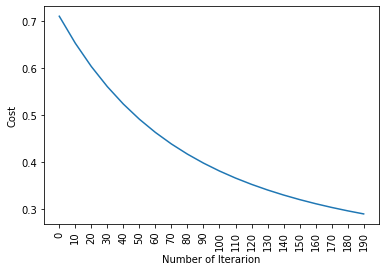

train accuracy: 95.42125078741888 %
test accuracy: 95.66962585332982 %


In [13]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    #update
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate =0.01, num_iterations = 200)

In [16]:
x,y = df.loc[:,df.columns != 'popularity_bin'], df.loc[:,'popularity_bin']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
y=y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)


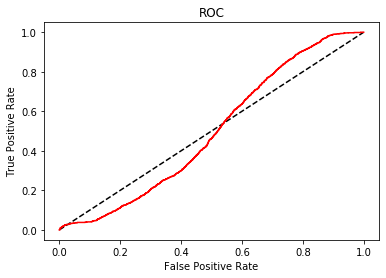

In [17]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(logreg,x_train,y_train,cv=k)
cross_val_log=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.95422252 0.95414927 0.95421916 0.95421916 0.95421916 0.95421916
 0.95421916 0.95421916 0.95421916 0.95421916]
Cross_val scores average:  0.9542125082640901


In [19]:
#GridSearchCV with Logreg
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))
##numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.9542125079229283
